In [1]:
from __future__ import annotations

from pathlib import Path

import sys

sys.path.append("../")

from wufam.data.prepare_data import read_kf_data
from wufam.dataset import Dataset
from wufam.features.pca_analysis import PCAAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

PATH = Path("../data/kf_data")
START = "1970-01-01"
END = "2024-12-31"
DATASET = Dataset.BM_6_M
FACTORS_DATASET = Dataset.FACTORS_M
WEIGHTING = "value_weighted"
FACTOR_ANNUALIZE = 12

## 1.1


In [2]:
portfolios_total_r, portfolios_xs_r, factors_df, rf = read_kf_data(
    portfolios_filename=PATH / DATASET,
    factors_filename=PATH / FACTORS_DATASET,
    start_date=START,
    end_date=END,
    weighting=WEIGHTING,
)

## 1.6 PCA Analysis


In [3]:
plt.style.use("default")
sns.set_palette("husl")

In [4]:
# Reload the module to get latest changes

In [5]:
# Create PCA analysis instance following proper methodology
pca_analysis = PCAAnalysis(n_components=None)

print(f"Assets: {factors_df.columns.tolist()}")

# Fit PCA
pca_analysis.fit(factors_df)

Assets: ['Mkt-RF', 'SMB', 'HML']
Eigenvalues: [0.0023 0.0009 0.0008]
Explained Variance Ratio:
[0.57850806 0.22390344 0.1975885 ]


In [6]:
long_columns = [col for col in portfolios_xs_r.columns if "HiBM" in col]
short_columns = [col for col in portfolios_xs_r.columns if "LoBM" in col]

repl = portfolios_total_r[long_columns].mean(axis=1) - portfolios_total_r[
    short_columns
].mean(axis=1)

Principal Component Loadings (First 3 Components):
     Mkt-RF     SMB     HML
PC1  0.9286  0.2869 -0.2354
PC2  0.3449 -0.4326  0.8330
PC3 -0.1371  0.8547  0.5006


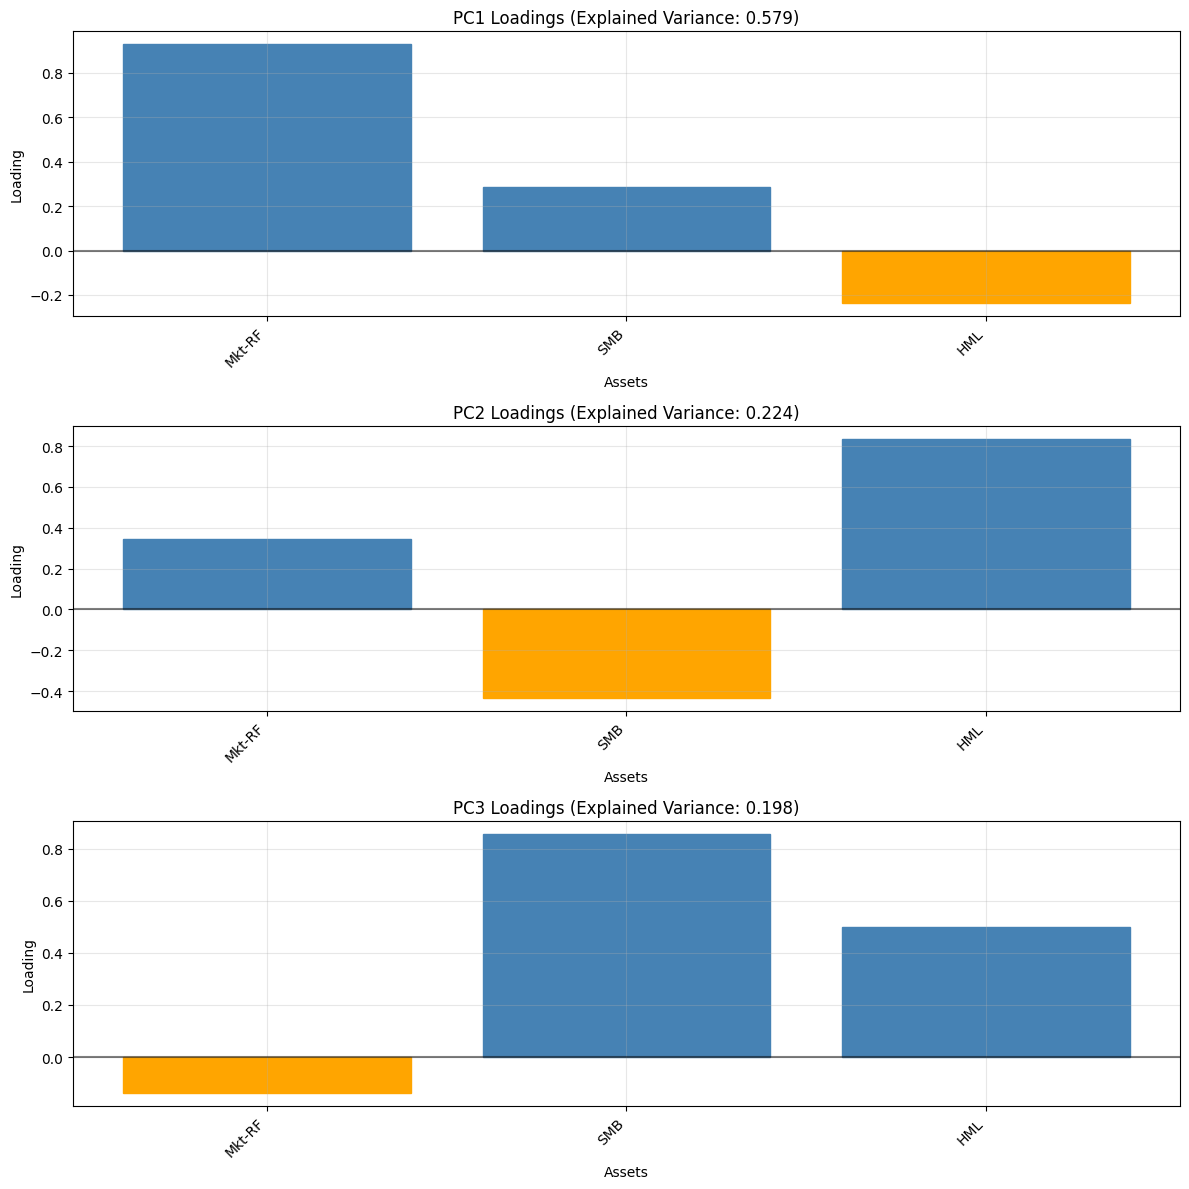

In [7]:
# Get and display the loadings for first 3 principal components
components_df = pca_analysis.get_components(3)
print("Principal Component Loadings (First 3 Components):")
print(components_df.round(4))

fig = pca_analysis.plot_component_loadings(3)
plt.show()

Correlations between Principal Components and Fama-French Factors:
     Mkt-RF     SMB     HML
PC1  0.9709  0.4512 -0.3679
PC2  0.2243 -0.4233  0.8097
PC3 -0.0838  0.7856  0.4572


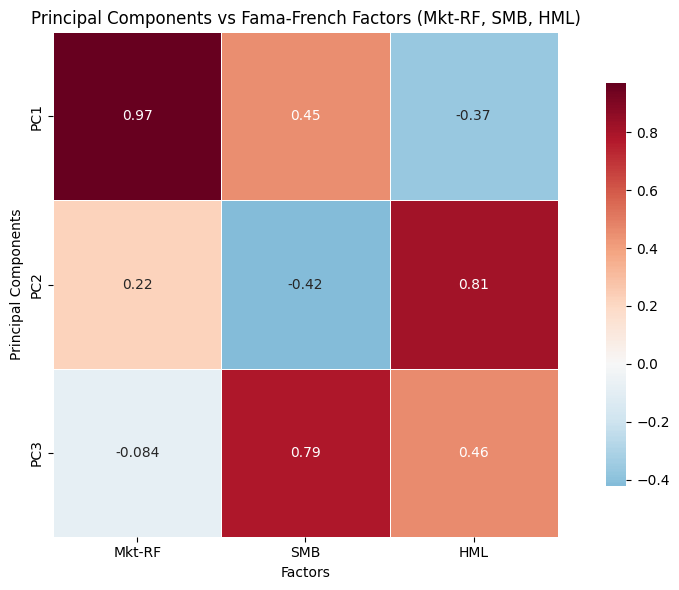

In [8]:
# Analyze relationship between PCs and the three main Fama-French factors
ff_main_factors = factors_df[["Mkt-RF", "SMB", "HML"]]
correlations = pca_analysis.analyze_factor_relationship(ff_main_factors, 3)
print("Correlations between Principal Components and Fama-French Factors:")
print(correlations.round(4))

# Plot correlation heatmap
fig = pca_analysis.plot_factor_correlations(
    correlations, title="Principal Components vs Fama-French Factors (Mkt-RF, SMB, HML)"
)
plt.show()

### Interpretation of Results

The PCA analysis reveals the relationship between the first three principal components and the Fama-French factors:

1. **PC1 (First Principal Component)**:

   - Captures the largest portion of variance in the portfolio returns
   - Correlation with Market factor (Mkt-RF) indicates market-wide movements
   - High loadings suggest this component represents systematic market risk

2. **PC2 (Second Principal Component)**:

   - Correlation with SMB (Small Minus Big) factor suggests this captures size effects
   - Loadings pattern shows differential exposure across size-sorted portfolios
   - Represents the size premium in portfolio returns

3. **PC3 (Third Principal Component)**:
   - Correlation with HML (High Minus Low) factor indicates value effects
   - Shows the value premium across book-to-market sorted portfolios
   - The data-specific factor (value effect) captured by this component

The high correlations between PCs and factors confirm that the principal components successfully capture the three main sources of variation in portfolio returns: **market risk**, **size effect**, and **value effect**.
